In [1]:
import json
import pandas as pd # pip install pandas

file = "python_engineer.json"
data = None
with open(file, 'r') as f:
    data = json.load(f)
    channel_id, stats = data.popitem()

In [2]:
channel_stats = stats['channel_statistics']
video_stats = stats['video_data']

In [3]:
print('views', channel_stats['viewCount'])
print('subscriber', channel_stats['subscriberCount'])
print('videos', channel_stats['videoCount'])

views 10430567
subscriber 157000
videos 179


In [4]:
sorted_videos = sorted(video_stats.items(), key=lambda item: int(item[1]["viewCount"]), reverse=True)

# print(type(sorted_videos))
vstats = []
for vid in sorted_videos:
    video_id = vid[0]
    title = vid[1]['title']
    views = int(vid[1]['viewCount'])
    likes = int(vid[1]['likeCount'])
    comments = int(vid[1]['commentCount'])
    vstats.append([title, views, likes, comments])

In [5]:
df = pd.DataFrame(vstats, columns=["title", "views", "likes", "comments"])
df.head(10)

,title,views,likes,comments
0,How to confuse a Python developer,980929,28922,557
1,Is this a bug or a feature in Python?,553372,16314,785
2,11 Tips And Tricks To Write Better Python Code,391409,16795,383
3,Do you know THIS about print() in Python??? 🤔,390719,20392,206
4,Deep Learning With PyTorch - Full Course,376332,8981,317
5,❌ DON'T use a for loop like this for multiple ...,268043,15626,160
6,PyScript - Run Python in the Browser! THE END ...,232693,9011,785
7,I built the same app 3 times | Which Python Fr...,228186,6333,313
8,Object Oriented Programming (OOP) In Python - ...,211784,6766,303
9,Never make this MISTAKE again in Python!!!,204315,7695,177


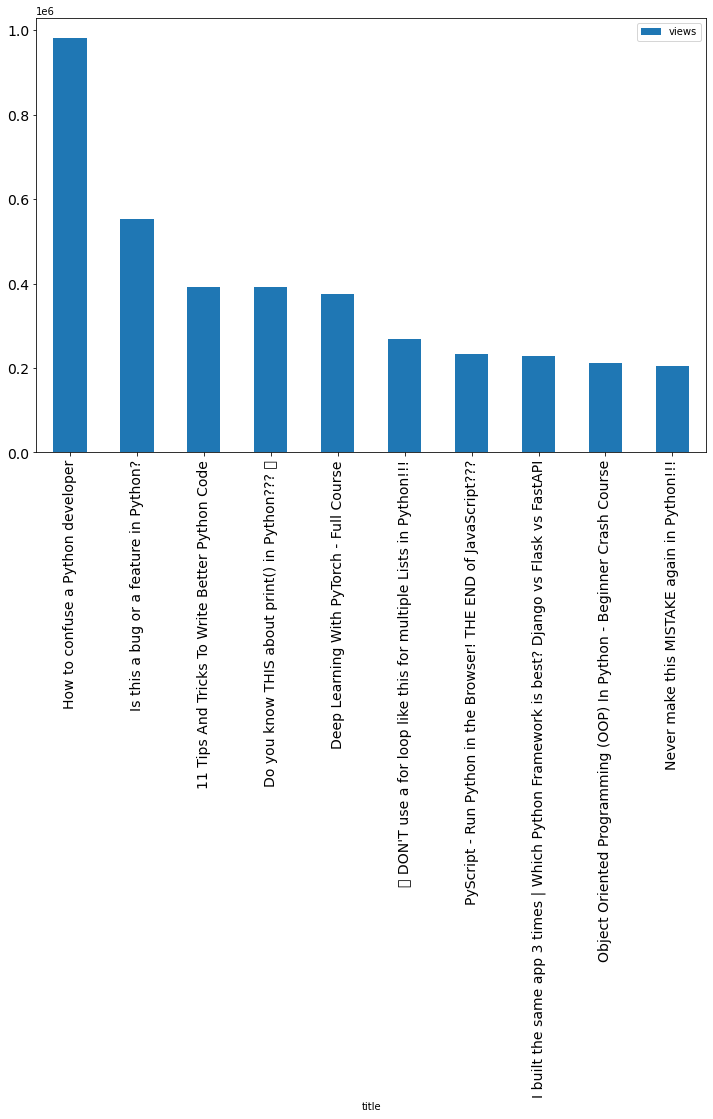

In [9]:
top10 = df.head(10)
tx = top10.plot.bar(x="title", y="views", figsize=(12,8), fontsize=14)

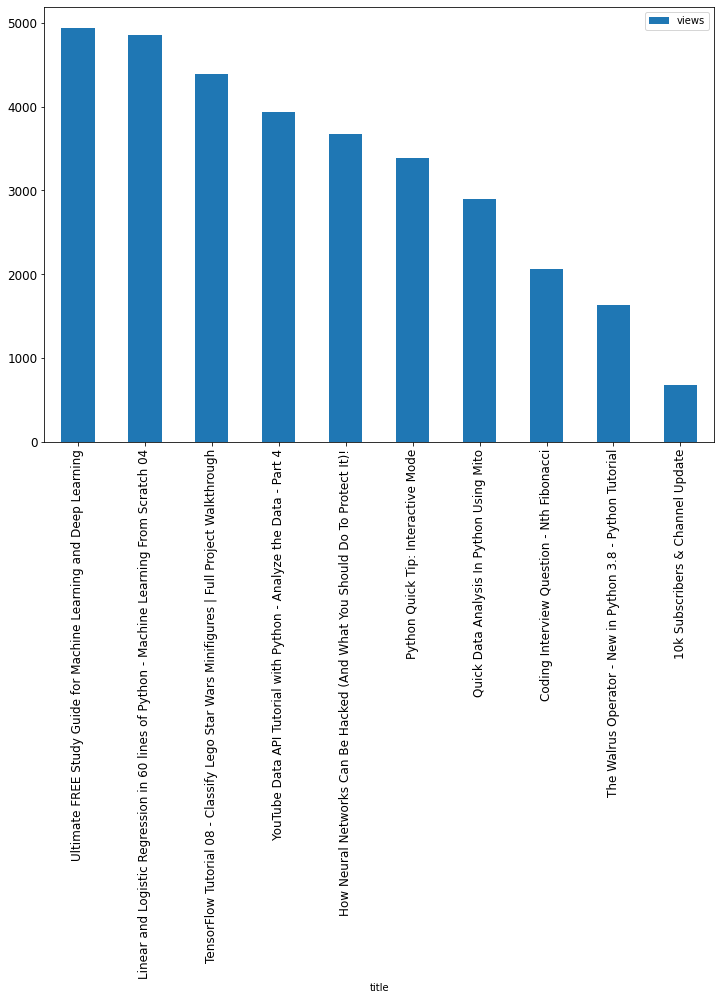

In [10]:
bottom10 = df.tail(10)
bx = bottom10.plot.bar(x="title", y="views", figsize=(12, 8), fontsize=12)

In [21]:
#likes
likes_avg = top10['likes'].mean()
comments_avg = top10['comments'].mean()
print("Top 10")
print('average likes', likes_avg)
print('average comments', comments_avg)

print("Bottom 10")
likes_avg = bottom10['likes'].mean()
comments_avg = bottom10['comments'].mean()
print('average likes', likes_avg)
print('average comments', comments_avg)

Top 10
average likes 13683.5
average comments 398.6
Bottom 10
average likes 117.0
average comments 23.2
